## Week 4 - Abed Tabbalat

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

## Exercise 3.1

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [2]:
resp = nsfg.ReadFemResp()

In [3]:
pmf_ch = thinkstats2.Pmf(resp.numkdhh, label='actual')

In [5]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

In [7]:
biased_pmf_ch = BiasPmf(pmf_ch, label='Observed')

In [8]:
thinkplot.PrePlot(2)

<Figure size 432x288 with 0 Axes>

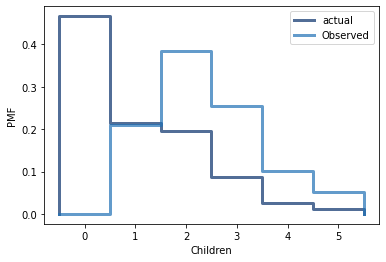

In [11]:
thinkplot.Pmfs([pmf_ch, biased_pmf_ch])
thinkplot.Config(xlabel='Children', ylabel='PMF')

In [12]:
print('Actual mean', pmf_ch.Mean())
print('Observed mean', biased_pmf_ch.Mean())

Actual mean 1.024205155043831
Observed mean 2.403679100664282


## Exercise 3.2

write a function called `PMFMean` and `PMFVar` that take a PMF object and compute the mean and variance. To test these methods, check that they are consistent with the methods `Mean` and `Var` provided by PMF.

In [30]:
def PmfMean(pmf):
    mean = 0.0
    for x, p in pmf.Items():
        mean += x*p
    return mean

In [31]:
def PmfVar(pmf, mean=None):
    var = 0
    if mean == None:
        mean = PmfMean(pmf)
    for x, p in pmf.Items():
        var += p * ( x - mean ) ** 2
    return var

## Exercise 4.1

How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [13]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [16]:
live, firsts, others = first.MakeFrames()
weights = live.totalwgt_lb

In [17]:
f_weights = firsts.totalwgt_lb
firsts_cdf = thinkstats2.Cdf(weights, label='firsts')

In [18]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [19]:
my_weight = 9
firsts_cdf.PercentileRank(my_weight)

92.48727594600575

In [ ]:
# Will definitely go and apologize.

## Exercise 4.2

The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [20]:
sample1 = np.random.random(1000)

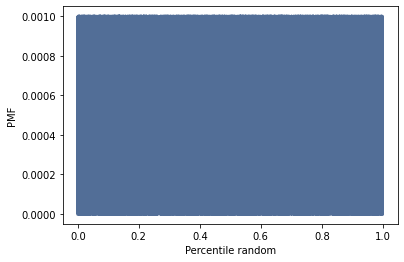

In [21]:
random_pmf = thinkstats2.Pmf(sample1)
thinkplot.Pmf(random_pmf)
thinkplot.Config(xlabel='Percentile random', ylabel='PMF')

#Since numbers are random the probability could be anything, hence the chart will exist as infinit points.

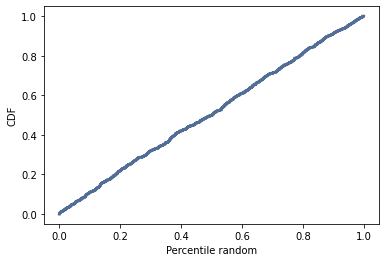

In [22]:
random_cdf = thinkstats2.Cdf(sample1)
thinkplot.Cdf(random_cdf)
thinkplot.Config(xlabel='Percentile random', ylabel='CDF')
# distribution on CDF is uniform.